# Minimum Wage Data by State and Country
This notebook runs through two different analyses on minimum wage:
1. Minimum Wage by State - identifying trends in minimum wage by state, and how this changes over the last decade.
2. Minimum Wage by Country - tracking minimum wage trends by country over the same time period, and identifying any underlying patterns among countries with similar trends.

## Minimum Wage by State
Dataset taken from the Labor Law Center, shows hourly minimum wage by state from 2010-2021 (projected).

In [2]:
import pandas as pd
min_wage_by_state = pd.read_csv("C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/LaborLawCenter-MinWageByState.csv")
min_wage_by_state.set_index('State', inplace = True)

# Feature engineering - adding a % change column to see increases by state
min_wage_by_state['% Change'] = min_wage_by_state['2021'] / min_wage_by_state['2010'] - 1

min_wage_by_state.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,% Change
State,,,,,,,,,,,,,
Alabama,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,7.25,0.000000
Alaska,7.75,7.75,7.75,7.75,7.75,8.75,9.75,9.80,9.84,9.89,10.19,10.34,0.334194
Arizona,7.25,7.35,7.65,7.80,7.90,8.05,8.05,10.00,10.50,11.00,12.00,12.15,0.675862
Arkansas,7.25,7.25,7.25,7.25,7.25,7.50,8.00,8.50,8.50,9.25,10.00,11.00,0.517241
California,8.00,8.00,8.00,8.00,9.00,9.00,10.00,10.50,11.00,12.00,13.00,14.00,0.750000


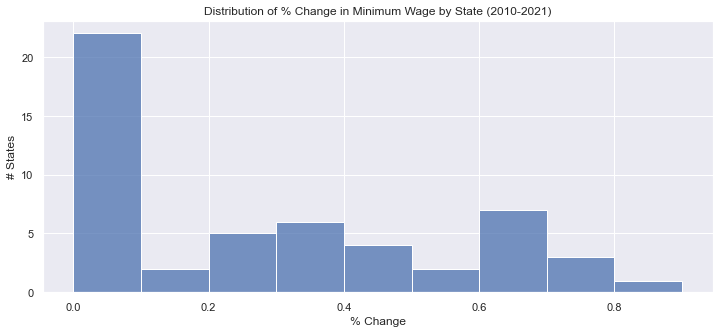

In [3]:
# Setting up Data Vis
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_theme()

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(min_wage_by_state['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage by State (2010-2021)', xlabel = "% Change", ylabel = "# States")

Graph above shows that roughly half of states in the US haven't raised their minimum wage by a significant amount over the last decade.

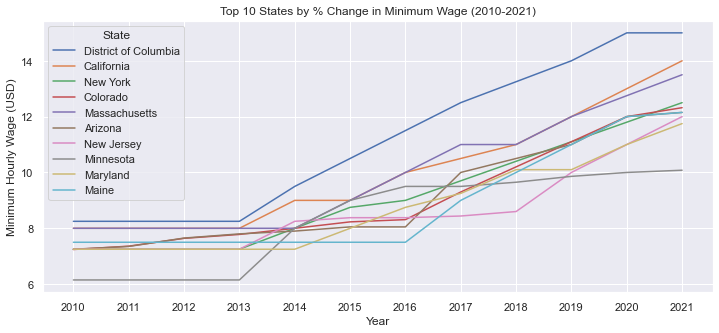

In [4]:
graph_data = min_wage_by_state.sort_values(by = '% Change', ascending = False)[0:10].drop(columns = ['% Change'])
graph_data = pd.melt(graph_data.reset_index(), id_vars = "State")

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'variable', hue = 'State', y = 'value')
g = g.set(title = 'Top 10 States by % Change in Minimum Wage (2010-2021)', xlabel = 'Year', ylabel = 'Minimum Hourly Wage (USD)')

Graph above shows that even states with steadily increasing minimum wage policies implemented minimal changes from 2010 through 2013. Need to do some further digging to understand if this is a data issue or a change in federal policy.

## Minimum Wage by Country
This data comes in two parts - the minimum wage by country by year (OECD data) and the country characteristics by country in 2020 (World Bank data).

Wages are reported in local currency, 2017 PPP $, and USD. Local currency is difficult to interpret/compare and therefore dropped from the dataset.

In [36]:
# OECD Data
min_wage_by_country = pd.read_excel('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/OECD-MinWageByCountry.xlsx',
                                   skiprows = 5)
min_wage_by_country.drop(columns = ['Source type', 'Unnamed: 6', 'Local currency'], inplace = True)
min_wage_by_country.rename(columns = {'Reference area': 'Country Name'}, inplace = True)
min_wage_by_country['Time'] = min_wage_by_country['Time'].astype('int')

# Rename some mismatched country names for matching later
oecd_rename = {'Bahamas': 'Bahamas, The',
              'Congo, Democratic Republic of the': 'Congo, Dem. Rep.',
              'Czechia': 'Czech Republic',
              "Côte d'Ivoire": "Cote d'Ivoire",
              'Egypt': 'Egypt, Arab Rep.',
              'Hong Kong, China': 'Hong Kong SAR, China',
              'Iran, Islamic Republic of': 'Iran, Islamic Rep.',
              'Korea, Republic of': 'Korea, Rep.',
              'Kyrgyzstan': 'Kyrgyz Republic',
              "Lao People's Democratic Republic": 'Lao PDR',
              'Moldova, Republic of': 'Moldova',
              'Venezuela, Bolivarian Republic of': 'Venezuela, RB',
              'Viet Nam': 'Vietnam'}
min_wage_by_country.replace({'Country Name': oecd_rename}, inplace = True)

min_wage_by_country.set_index(['Country Name', 'Time'], inplace = True)
min_wage_by_country.head()

2017 PPP $  U.S. dollars
Country Name Time                          
Afghanistan  2010      258.23         86.11
             2011      297.83        106.96
             2012      292.57         98.19
             2013      283.19         90.29
             2015      290.79         81.77

In [37]:
# World Bank Data
world_dev_ind = pd.read_csv('C:/Users/aliya/Documents/UChicago/Chicago Analyst/MinWage/Data/WorldBank-WDIByCountry.csv')
world_dev_ind.drop(columns = ['Country Code', 'Indicator Code', 'Unnamed: 65'], inplace = True)
world_dev_ind.head()

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Arab World,Access to clean fuels and technologies for coo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.783289,83.120303,83.533457,83.897596,84.171599,84.510171,NaN,NaN,NaN,NaN
1,Arab World,Access to electricity (% of population),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87.199474,87.512260,88.129881,87.275323,88.720097,89.308602,90.283638,89.286856,NaN,NaN
2,Arab World,"Access to electricity, rural (% of rural popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,75.958878,77.251714,78.165706,75.512153,78.211000,79.065508,81.102134,79.248100,NaN,NaN
3,Arab World,"Access to electricity, urban (% of urban popul...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.466418,96.435957,96.772853,96.466705,96.936319,97.290083,97.467915,97.063959,NaN,NaN
4,Arab World,Account ownership at a financial institution o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22.260538,NaN,NaN,30.277130,NaN,NaN,37.165211,NaN,NaN,NaN


In [38]:
# Commented out to save space

# # 1440 unique indicators per country is way more than we need; here's the full list:
# with pd.option_context('display.max_rows', 10000, 'display.max_columns', 10000, 'display.max_colwidth', 100):
#     display(pd.Series(world_dev_ind['Indicator Name'].unique()))

In [39]:
# Arbitrarily picking some interesting indicators
narrow_indicators = [                    
                     # GDP-related indicators
                     'GDP (current US$)',
                     'GDP growth (annual %)',
                     'Trade (% of GDP)',
                     'Current health expenditure (% of GDP)',
                     'Tax revenue (% of GDP)',
                     'Military expenditure (% of GDP)',
                     
                     # Income disparity
                     'Income share held by lowest 20%',
                     'Income share held by fourth 20%',
                     
                     # Gender disparity
                     'Labor force, female (% of total labor force)',
                     'Women Business and the Law Index Score (scale 1-100)',

                     # Other stats
                     'Land area (sq. km)',
                     'Air transport, passengers carried',
                     'CO2 emissions (kt)',
                     'Labor force, total',
                     'Population, total',
                     'Urban population (% of total population)',
                     'Current health expenditure per capita (current US$)',
                     'Ease of doing business score (0 = lowest performance to 100 = best performance)'
                     ]

# Filtering down the dataset
world_dev_ind = world_dev_ind[world_dev_ind['Indicator Name'].isin(narrow_indicators)]

In [40]:
# Pivoting and unpivoting data to get indicators above from 2010-2020 in a usable format
world_dev_ind = pd.melt(world_dev_ind, id_vars = ['Country Name', 'Indicator Name'], var_name = 'Time')
world_dev_ind['Time'] = world_dev_ind['Time'].astype('int')
world_dev_ind = world_dev_ind[world_dev_ind['Time'] > 2009]
world_dev_ind= pd.pivot(world_dev_ind, index = ['Country Name', 'Time'], columns = ['Indicator Name'], values = ['value'])
world_dev_ind.columns = pd.Series(narrow_indicators).sort_values()

# Final datatset
world_dev_ind.head()

Air transport, passengers carried  CO2 emissions (kt)  \
Country Name Time                                                          
Afghanistan  2010                       1.999127e+06            8463.436   
             2011                       2.279341e+06           12240.446   
             2012                       1.737962e+06           10755.311   
             2013                       2.044188e+06            9050.156   
             2014                       2.209428e+06            8467.103   

                   Current health expenditure (% of GDP)  \
Country Name Time                                          
Afghanistan  2010                               8.569672   
             2011                               8.561907   
             2012                               7.897168   
             2013                               8.805964   
             2014                               9.528878   

                   Current health expenditure per capita (current US$)  \
Country Name Time                                                        
Afghanistan  2010                                          44.990532     
             2011                                          50.853474     
             2012                                          51.440262     
             2013                                          55.034630     
             2014                                          59.008934     

                   Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country Name Time                                                                                    
Afghanistan  2010                                                NaN                                 
             2011                                                NaN                                 
             2012                                                NaN                                 
             2013                                                NaN                                 
             2014                                                NaN                                 

                   GDP (current US$)  GDP growth (annual %)  \
Country Name Time                                             
Afghanistan  2010       1.585657e+10              14.362441   
             2011       1.780429e+10               0.426355   
             2012       2.000160e+10              12.752287   
             2013       2.056107e+10               5.600745   
             2014       2.048489e+10               2.724543   

                   Income share held by fourth 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2014                              NaN   

                   Income share held by lowest 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2014                              NaN   

                   Labor force, female (% of total labor force)  \
Country Name Time                                                 
Afghanistan  2010                                     15.366971   
             2011                                     15.703252   
             2012                                     16.114022   
             2013                                     16.959322   
             2014                                     17.848257   

                   Labor force, total  Land area (sq. km)  \
Country Name Time                                           
Afghanistan  2010           7173385.0  

In [43]:
# Join the World Bank & OECD data
country_data = min_wage_by_country.merge(world_dev_ind, how = 'inner', on = ['Country Name', 'Time'])
country_data.head()

2017 PPP $  U.S. dollars  \
Country Name Time                             
Afghanistan  2010      258.23         86.11   
             2011      297.83        106.96   
             2012      292.57         98.19   
             2013      283.19         90.29   
             2015      290.79         81.77   

                   Air transport, passengers carried  CO2 emissions (kt)  \
Country Name Time                                                          
Afghanistan  2010                       1.999127e+06            8463.436   
             2011                       2.279341e+06           12240.446   
             2012                       1.737962e+06           10755.311   
             2013                       2.044188e+06            9050.156   
             2015                       1.929907e+06            9035.488   

                   Current health expenditure (% of GDP)  \
Country Name Time                                          
Afghanistan  2010                               8.569672   
             2011                               8.561907   
             2012                               7.897168   
             2013                               8.805964   
             2015                              10.105348   

                   Current health expenditure per capita (current US$)  \
Country Name Time                                                        
Afghanistan  2010                                          44.990532     
             2011                                          50.853474     
             2012                                          51.440262     
             2013                                          55.034630     
             2015                                          58.906528     

                   Ease of doing business score (0 = lowest performance to 100 = best performance)  \
Country Name Time                                                                                    
Afghanistan  2010                                                NaN                                 
             2011                                                NaN                                 
             2012                                                NaN                                 
             2013                                                NaN                                 
             2015                                           39.25519                                 

                   GDP (current US$)  GDP growth (annual %)  \
Country Name Time                                             
Afghanistan  2010       1.585657e+10              14.362441   
             2011       1.780429e+10               0.426355   
             2012       2.000160e+10              12.752287   
             2013       2.056107e+10               5.600745   
             2015       1.990711e+10               1.451315   

                   Income share held by fourth 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2015                              NaN   

                   Income share held by lowest 20%  \
Country Name Time                                    
Afghanistan  2010                              NaN   
             2011                              NaN   
             2012                              NaN   
             2013                              NaN   
             2015                              NaN   

                   Labor force, female (% of total labor force)  \
Country Name Time                                                 
Afghanistan  2010                                     15.366971   
             2011                                     15.703252   
             2012                

In [44]:
country_data = country_data.reset_index()

## Main Analysis
Now that we have the dataset above with selected World Bank indicators by country by year, we can start diving into some analysis.

In [56]:
g20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia',
       'Japan', 'Korea, Rep.', 'Russian Federation', 'Saudi Arabia', 'South Africa', 'Turkey', 'United Kingdom',
       'United States'] # Missing Italy and Mexico in OECD data
g7 = ['United States', 'United Kingdom', 'France', 'Japan', 'Germany', 'Italy', 'Canada']

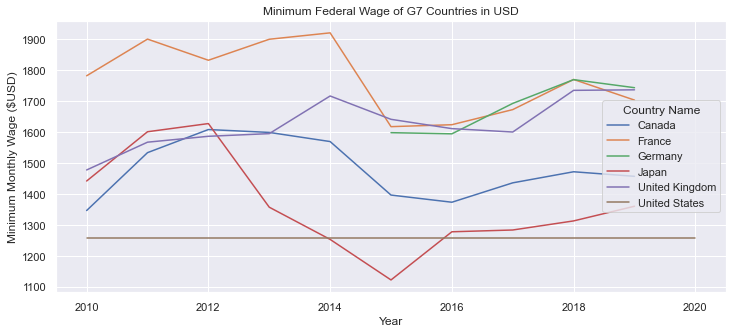

In [57]:
graph_data = country_data[country_data['Country Name'].isin(g7)]
graph_data

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country Name', y = 'U.S. dollars')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in USD', xlabel = 'Year', ylabel = 'Minimum Monthly Wage ($USD)')

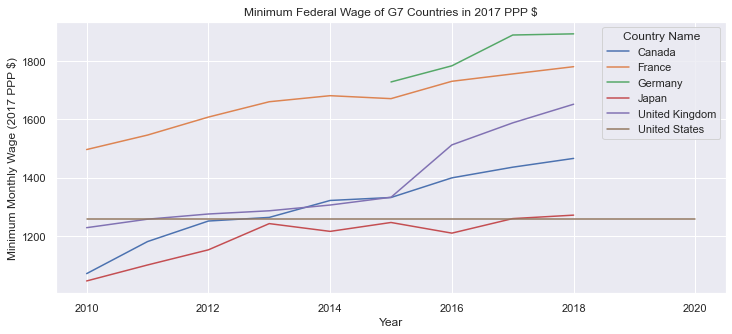

In [58]:
graph_data = country_data[country_data['Country Name'].isin(g7)]
graph_data

plt.figure(figsize=(12, 5))
g = sns.lineplot(data = graph_data, x = 'Time', hue = 'Country Name', y = '2017 PPP $')
g = g.set(title = 'Minimum Federal Wage of G7 Countries in 2017 PPP $', xlabel = 'Year', ylabel = 'Minimum Monthly Wage (2017 PPP $)')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


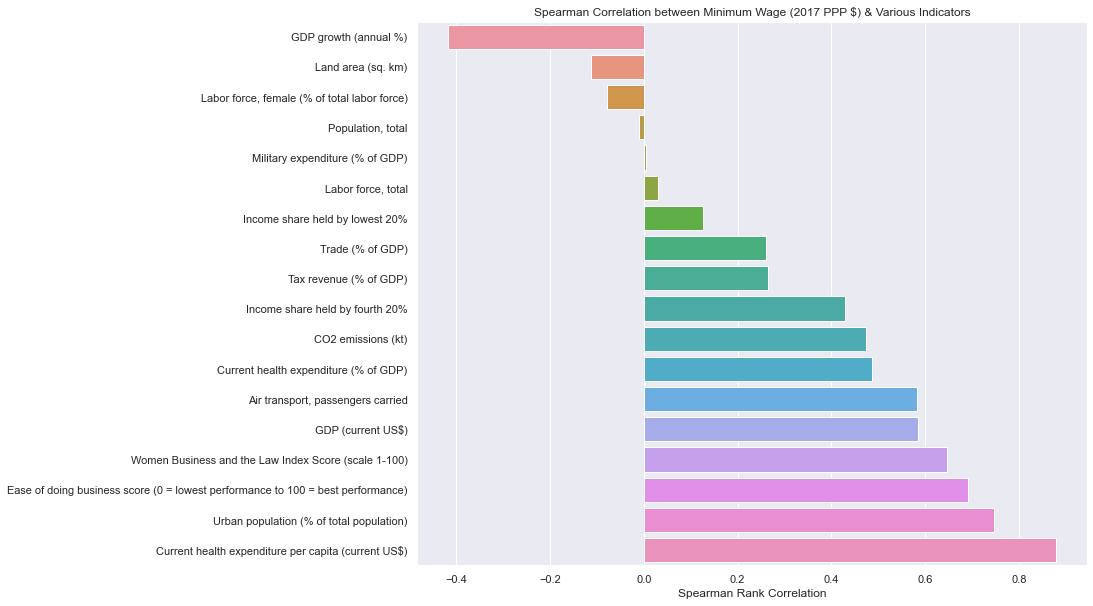

In [67]:
# Identifying correlation between minimum monthly wage and World Bank Indicators
graph_data = country_data[country_data.columns[2:]].corr(method = 'spearman')['2017 PPP $'].sort_values()[:-2]

plt.figure(figsize=(12, 10))
g = sns.barplot(graph_data.values, graph_data.index)
g = g.set(title = 'Spearman Correlation between Minimum Wage (2017 PPP $) & Various Indicators', 
          xlabel = 'Spearman Rank Correlation')

According to the chart above, higher health expenditure, higher % urban population, and higher ease of doing business all are all positiviely correlated with minimum monthly wages. However, countries with a high GDP annual growth tend to have lower minimum wages, as do countries with greater land area and military expenditure.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


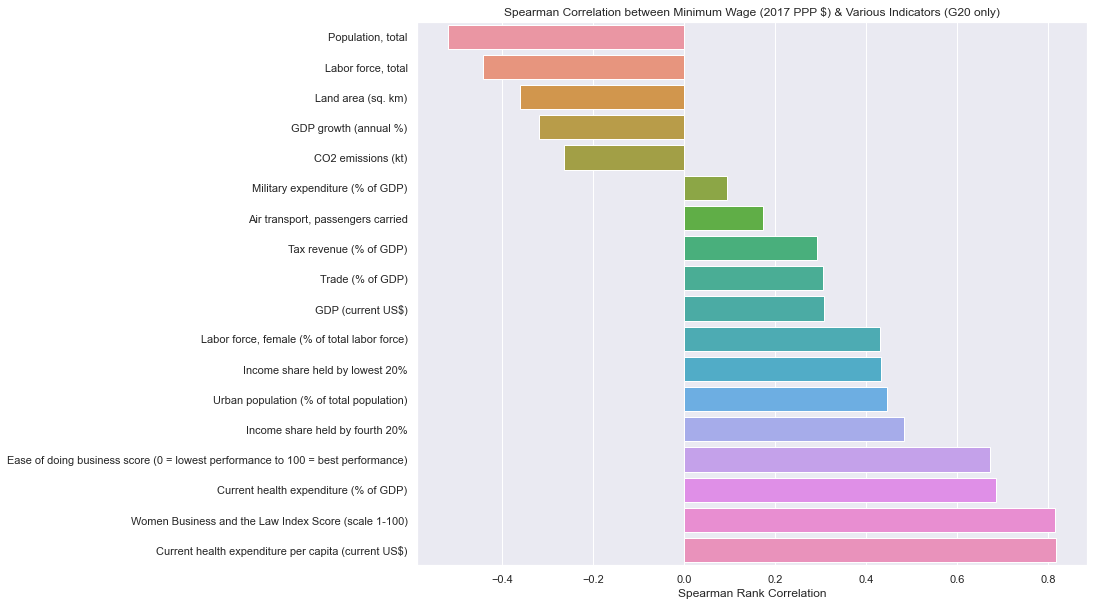

In [73]:
# Identifying correlation between minimum monthly wage and World Bank Indicators
graph_data = country_data[country_data['Country Name'].isin(g20)]
graph_data = graph_data[graph_data.columns[2:]].corr(method = 'spearman')['2017 PPP $'].sort_values()[:-2]

plt.figure(figsize=(12, 10))
g = sns.barplot(graph_data.values, graph_data.index)
g = g.set(title = 'Spearman Correlation between Minimum Wage (2017 PPP $) & Various Indicators (G20 only)', 
          xlabel = 'Spearman Rank Correlation')

Graph above shows that within the G20, smaller countries with steady GDP and low C02 emissions tend to have much higher adjusted monthly minimum wages.

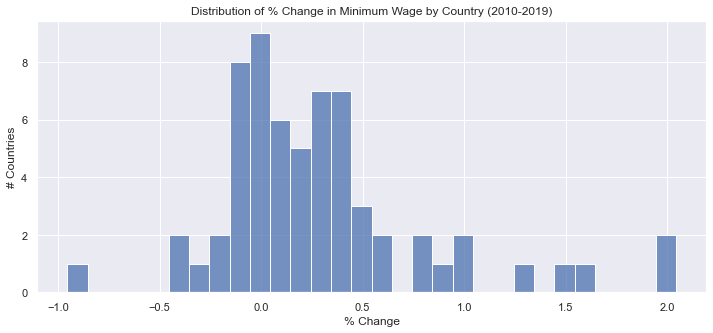

In [82]:
graph_data = country_data.pivot(index = ['Country Name'], columns = ['Time'], values = ['U.S. dollars'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[9] / graph_data[0] - 1
graph_data

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage by Country (2010-2019)', xlabel = "% Change", ylabel = "# Countries")

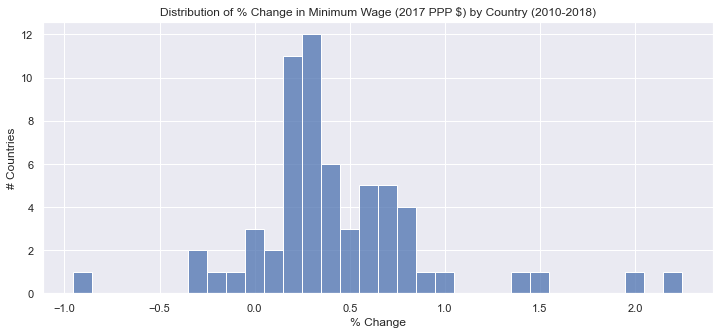

In [81]:
graph_data = country_data.pivot(index = ['Country Name'], columns = ['Time'], values = ['2017 PPP $'])
graph_data
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1 # Note this was changed to 2018 from above to allow for more data
graph_data

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage (2017 PPP $) by Country (2010-2018)', 
          xlabel = "% Change", ylabel = "# Countries")

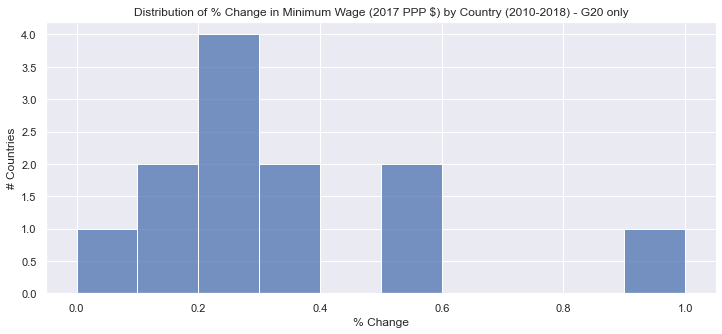

In [83]:
graph_data = country_data[country_data['Country Name'].isin(g20)]
graph_data = graph_data.pivot(index = ['Country Name'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1 # Note this was changed to 2018 from above to allow for more data

# Graph
plt.figure(figsize=(12, 5))
g = sns.histplot(graph_data['% Change'], binwidth = 0.1)
g = g.set(title = 'Distribution of % Change in Minimum Wage (2017 PPP $) by Country (2010-2018) - G20 only', 
          xlabel = "% Change", ylabel = "# Countries")

All three histograms above show similar stories - most countries have raised federal monthly wages between 20-30% over the last decade, whether it's in nominal USD, PPP adjusted, or filtered down to just G20 nations.

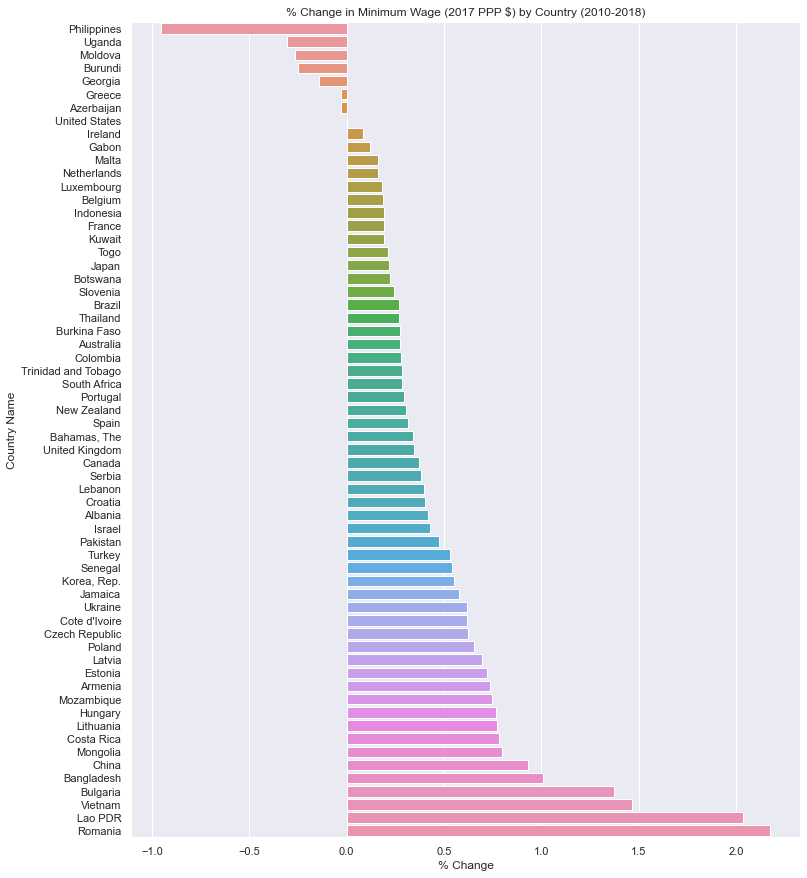

In [87]:
graph_data = country_data.pivot(index = ['Country Name'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1
graph_data = graph_data['% Change'].sort_values().reset_index().dropna()

# Graph
plt.figure(figsize=(12, 15))
g = sns.barplot(data = graph_data, x = '% Change', y = 'Country Name')
g = g.set(title = '% Change in Minimum Wage (2017 PPP $) by Country (2010-2018)', xlabel = "% Change")

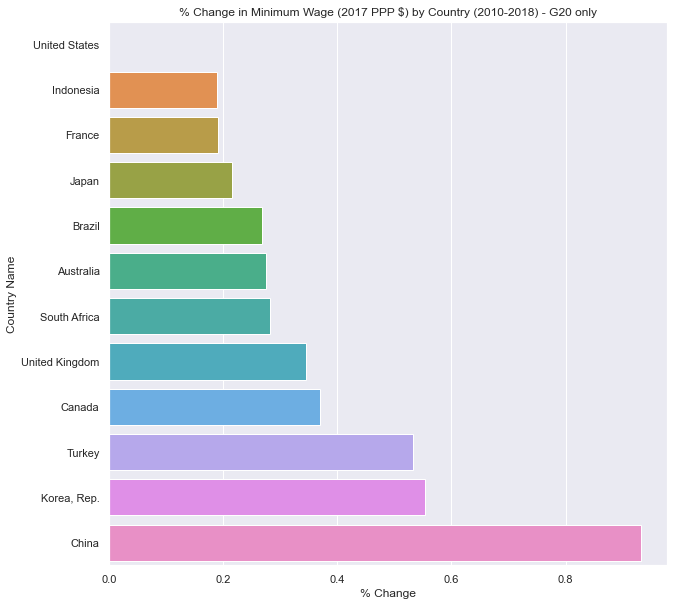

In [91]:
graph_data = country_data[country_data['Country Name'].isin(g20)]
graph_data = graph_data.pivot(index = ['Country Name'], columns = ['Time'], values = ['2017 PPP $'])
graph_data.columns = range(0, 11)
graph_data['% Change'] = graph_data[8] / graph_data[0] - 1
graph_data = graph_data['% Change'].sort_values().reset_index().dropna()

# Graph
plt.figure(figsize=(10, 10))
g = sns.barplot(data = graph_data, x = '% Change', y = 'Country Name')
g = g.set(title = '% Change in Minimum Wage (2017 PPP $) by Country (2010-2018) - G20 only', xlabel = "% Change")

Above charts show % change in minimum wage (adjusted for PPP). We're missing PPP adjusted data for a few countries, including Italy, Mexico, and Germany so they're excluded above.